In [62]:
import numpy as np
import pandas as pd

In [13]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [32]:
df=pd.read_csv("C:\\Users\\harsh\\Desktop\\student-mat.csv")
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [36]:
df['age'].value_counts()

age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

In [38]:
df['school'].unique()

array(['GP', 'MS'], dtype=object)

In [40]:
df['Fjob'].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [42]:
gruplar_okul = df.groupby('school')['G3'].mean()
print(gruplar_okul)

school
GP    10.489971
MS     9.847826
Name: G3, dtype: float64


In [44]:
gruplar_egitim = df.groupby(['Medu', 'Fedu'])['G3'].mean()
print(gruplar_egitim)

Medu  Fedu
0     1        9.000000
      2       15.000000
1     0       16.000000
      1        8.297297
      2        9.333333
      3        7.200000
      4       13.000000
2     1        9.214286
      2        9.333333
      3       10.529412
      4       12.714286
3     1       11.266667
      2       10.321429
      3       10.236842
      4        9.611111
4     0       10.000000
      1        8.000000
      2       12.894737
      3       11.550000
      4       11.657143
Name: G3, dtype: float64


In [48]:
object_columns = df.select_dtypes(include=['object'])
df_dummies = pd.get_dummies(df, columns=object_columns.columns)


In [50]:
df_dummies.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,...,0.103063,-0.103063,0.086632,-0.086632,0.209081,-0.209081,0.112094,-0.112094,-0.164669,0.164669
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,...,-0.108277,0.108277,-0.193263,0.193263,-0.168845,0.168845,-0.201463,0.201463,-0.039681,0.039681
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,...,-0.112643,0.112643,-0.157177,0.157177,-0.174566,0.174566,-0.127507,0.127507,-0.015602,0.015602
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,...,0.007766,-0.007766,0.033338,-0.033338,0.083508,-0.083508,0.111302,-0.111302,-0.021962,0.021962
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,...,-0.089877,0.089877,-0.081325,0.081325,-0.175081,0.175081,-0.059422,0.059422,-0.053285,0.053285
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,...,0.069341,-0.069341,0.100734,-0.100734,0.300316,-0.300316,0.063451,-0.063451,-0.093137,0.093137
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,...,-0.040687,0.040687,0.003581,-0.003581,-0.024319,0.024319,-0.032768,0.032768,0.063816,-0.063816
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,...,-0.089728,0.089728,0.024696,-0.024696,0.061244,-0.061244,-0.051286,0.051286,0.011182,-0.011182
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,...,-0.046088,0.046088,-0.004612,0.004612,0.039700,-0.039700,-0.074370,0.074370,-0.007870,0.007870
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,...,0.066508,-0.066508,0.084849,-0.084849,0.069828,-0.069828,-0.036210,0.036210,-0.015121,0.015121


In [52]:
df_dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  G3                 395 non-null    int64
 16  school_GP          395 non-null    bool 
 17  school_MS       

In [54]:
df2=df['status'] = np.where(df['G3'] >= 10, 'başarılı', 'başarısız')
print(df)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... freetime goout  Dalc  Walc  health absence

In [56]:
df_renamed = df.rename(columns={'school': 'schooltype', 'sex': 'gender'})
print(df_renamed)

    schooltype gender  age address famsize Pstatus  Medu  Fedu      Mjob  \
0           GP      F   18       U     GT3       A     4     4   at_home   
1           GP      F   17       U     GT3       T     1     1   at_home   
2           GP      F   15       U     LE3       T     1     1   at_home   
3           GP      F   15       U     GT3       T     4     2    health   
4           GP      F   16       U     GT3       T     3     3     other   
..         ...    ...  ...     ...     ...     ...   ...   ...       ...   
390         MS      M   20       U     LE3       A     2     2  services   
391         MS      M   17       U     LE3       T     3     1  services   
392         MS      M   21       R     GT3       T     1     1     other   
393         MS      M   18       R     LE3       T     3     2  services   
394         MS      M   19       U     LE3       T     1     1     other   

         Fjob  ... freetime goout  Dalc  Walc  health absences  G1  G2  G3  \
0     tea

In [68]:
def plot_missing_data_matrix(dataframe: pd.DataFrame) -> None:

    import missingno as msno
    
    if not isinstance(dataframe, pd.DataFrame):
        raise TypeError("Input must be a pandas DataFrame")
    
    msno.matrix(dataframe)

In [70]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,status
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,başarısız
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,başarısız
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,başarılı


In [72]:
import matplotlib.pyplot as plt

In [74]:
job=df['Fjob'].value_counts()



([<matplotlib.patches.Wedge at 0x1d3a21acfe0>,
 [Text(-0.16991725306957467, 1.0867971876616587, 'other'),
  Text(-0.40575044784365405, -1.0224316965326703, 'services'),
  Text(0.7382081610145156, -0.8155051876055524, 'teacher'),
  Text(0.9926867640595624, -0.47389132558103947, 'at_home'),
  Text(1.0887469018354485, -0.15694006417646356, 'health')],
 [Text(-0.09268213803794982, 0.5927984659972683, '54.9%'),
  Text(-0.22131842609653854, -0.5576900162905474, '28.1%'),
  Text(0.40265899691700846, -0.44482101142121033, '7.3%'),
  Text(0.5414655076688522, -0.25848617758965786, '5.1%'),
  Text(0.5938619464556991, -0.0856036713689801, '4.6%')])

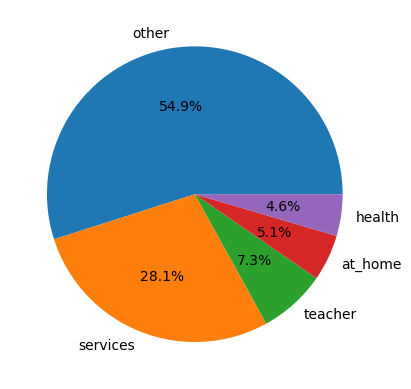

In [76]:
plt.pie(job.values, labels= job.index,autopct="%1.1f%%")

In [78]:
yas=df['age'].value_counts()



In [82]:
def plot_age_distribution(ages: pd.Series, color: str = '#FFB6C1') -> None:

    
    plt.style.use('seaborn')
    
    # Set plot attributes
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Number of People')
    
    # Create bar plot
    plt.bar(ages.index, ages.values, color=color)

# Usage:
# plot_age_distribution(yas)

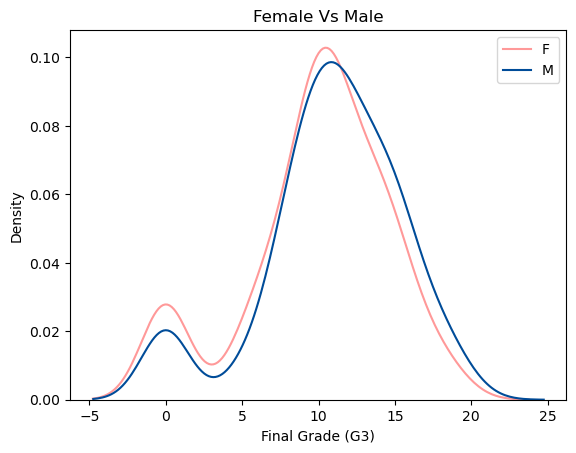

In [84]:
import seaborn as sns
sns.kdeplot(df.loc[df['sex']=='F', 'G3'], label='F', color='#ff9999')
sns.kdeplot(df.loc[df['sex']=='M', 'G3'], label='M', color='#004c99')

plt.title('Female Vs Male')
plt.xlabel('Final Grade (G3)')
plt.legend()

plt.show()

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
df_model = df[['Medu', 'Fedu', 'goout', 'Walc', 'failures', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']]
X = df_model.drop(columns='G3', axis=1)
y = df_model['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error:", mse)
print("R Squared:", r2)

Mean Squared Error: 4.102431169560603
R Squared: 0.8282489472923975
